In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid_df = pd.read_csv('data/covid_df.csv')
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           86785 non-null  int64  
 1   date                                 86785 non-null  object 
 2   country                              86785 non-null  object 
 3   confirmed                            86785 non-null  float64
 4   deaths                               86785 non-null  float64
 5   recovered                            86785 non-null  float64
 6   active                               86785 non-null  float64
 7   daily_confirmed                      86564 non-null  float64
 8   daily_deaths                         86564 non-null  float64
 9   daily_recovered                      86564 non-null  float64
 10  iso_code                             18451 non-null  object 
 11  total_vaccinations          

In [8]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on='country')
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df


,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,3616,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,3617,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,25726900,0.000016
2,3618,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,25726900,0.000000
3,3619,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,25726900,0.000004
4,3620,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,25726900,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,82537,2021-05-25,United Kingdom,4483177.0,128001.0,15453.0,4339723.0,2417.0,15.0,8.0,...,56.27,34.62,8669.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2.855140,0.344689,67802690,0.003565
2436,82538,2021-05-26,United Kingdom,4486168.0,128010.0,15477.0,4342681.0,2991.0,9.0,24.0,...,56.61,35.25,8731.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2.853437,0.344994,67802690,0.004411
2437,82539,2021-05-27,United Kingdom,4489552.0,128020.0,15480.0,4346052.0,3384.0,10.0,3.0,...,56.99,35.89,8736.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2.851509,0.344801,67802690,0.004991
2438,82540,2021-05-28,United Kingdom,4493582.0,128030.0,15480.0,4350072.0,4030.0,10.0,0.0,...,57.29,36.53,8723.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2.849175,0.344491,67802690,0.005944


<AxesSubplot:xlabel='daily_confirmed_per_hundred', ylabel='country'>

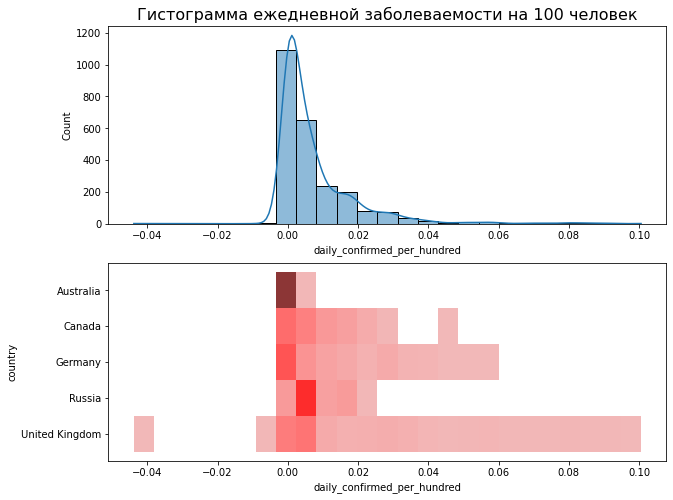

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
)
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)

sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
)


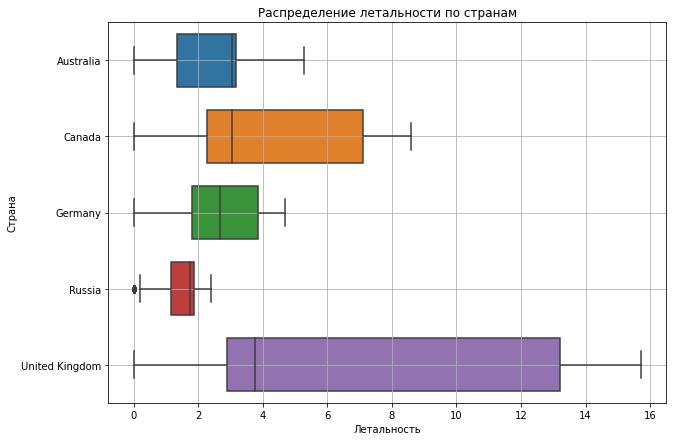

In [32]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение летальности по странам')
boxplot.set_xlabel('Летальность')
boxplot.set_ylabel('Страна')
boxplot.grid()

Text(0.5, 1.0, 'Средний процент болеющего населения по кварталам')

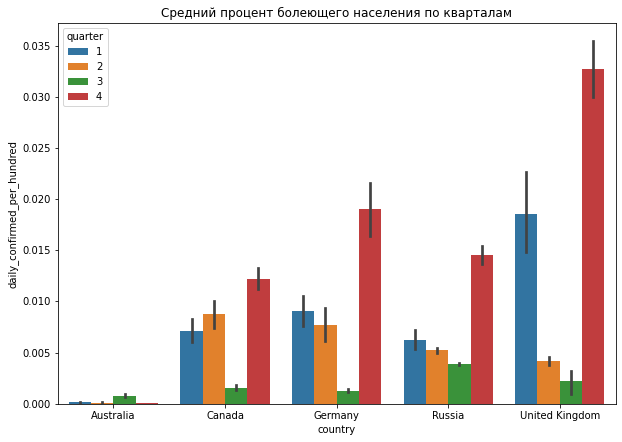

In [42]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['date'] = pd.to_datetime(croped_covid_df['date'])
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter

barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter'
)
barplot.set_title('Средний процент болеющего населения по кварталам')
    


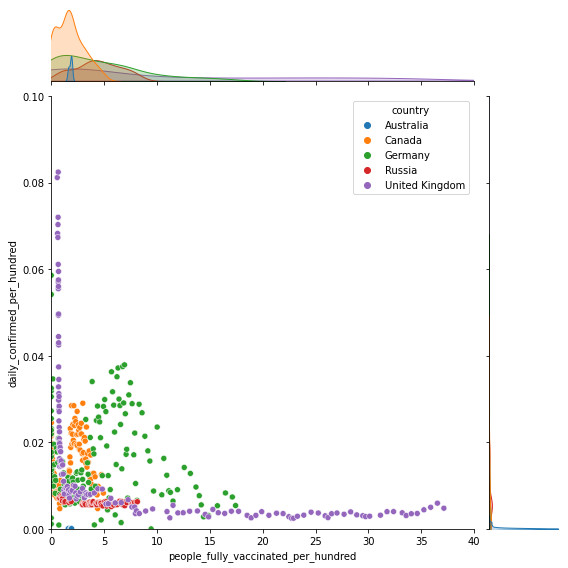

In [50]:
jointplot = sns.jointplot(
    data=croped_covid_df,
    x='people_fully_vaccinated_per_hundred',
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim=(0,40),
    ylim=(0, 0.1),
    height=8
)

In [52]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
pivot

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


Text(0.5, 1.0, 'Тепловая карта вакцинации')

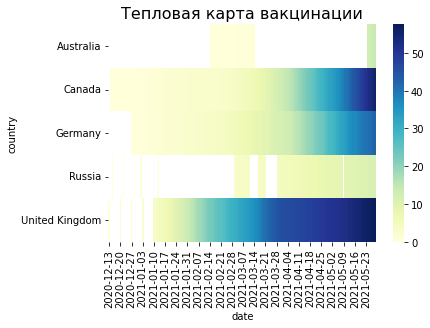

In [56]:
heatmap = sns.heatmap(
    data=pivot,
    cmap='YlGnBu'
)
heatmap.set_title('Тепловая карта вакцинации', fontsize=16)

Text(0.5, 1.0, 'Тепловая карта заболеваемости')

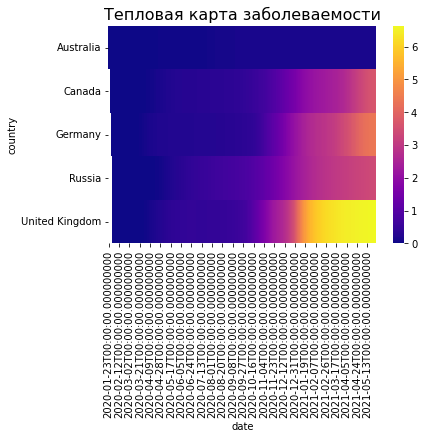

In [78]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
heatmap = sns.heatmap(
    data=pivot,
    cmap='plasma'
)
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16)

Text(0.5, 1.0, 'Число выздоровлений')

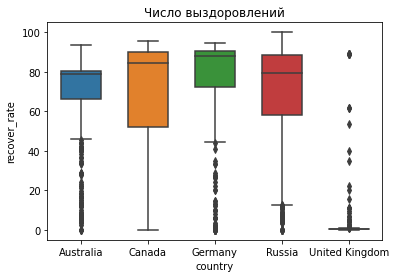

In [86]:
boxplot = sns.boxplot(
    data = croped_covid_df,
    x='country',
    y='recover_rate',
    orient='v',
    width=0.6
)
boxplot.set_title('Число выздоровлений')